## Perzeptron Klassifizierer

In [3]:
import numpy as np
import pandas as pd

In [4]:
data = "../data"

iris = "%s/iris.data" % data

In [3]:
class Perceptron(object):
    """ Perzeptron-Klassifizierer.
    
    Parameter
    ---------
    eta : float
        Lernrate (zwischen 0.0 und 1.0)
    n_iter : int
        Durchläufe der Trainingsdatensätze
    random_state : int
        Zufallszahlengenerator für Gewichtungen initialisieren
        
    Attribute
    ----------
    w_ : 1d-array
        Gewichtungen nach Anpassung
    errors_ : list
        Anzahl der Fehlklassifizierungen (Updates) pro Epoche (Training)
    """
    
    def __init__(self, eta=0.01, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Anpassung an die Trainingsdaten
        
        Parameter
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Trainingsvektoren, n_samples ist die Anzahl der Trainingsobjekte
            und n_features ist die Anzahl der Merkmale
        y : array-like, shape = [n_samples]
            Zielwerte
            
        Rückgabewerte
        ----------
        self : object
        """
        
        random_gen = np.random.RandomState(self.random_state)
        self.w_ = random_gen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        print(f"random weights initialized: {self.w_}")
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                print(f"xi, target: {xi}, {target}")
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
                print(f"Errors: \n {errors}")
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Nettoeingabe berechnen"""
        netinput = np.dot(X, self.w_[1:]) + self.w_[0]
        print(f"Net input: \n {netinput}")
        return netinput
    
    def predict(self, X):
        """Klassenbezeichnung zurückgeben"""
        prediction = np.where(self.net_input(X) >= 0.0, 1, -1)
        print(f"Prediction: \n {prediction}")
        return prediction

In [5]:
df_iris = pd.read_csv(iris, header=None)

df_iris.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
y = df_iris.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [8]:
X = df_iris.iloc[0:100, [0,2]].values
#X

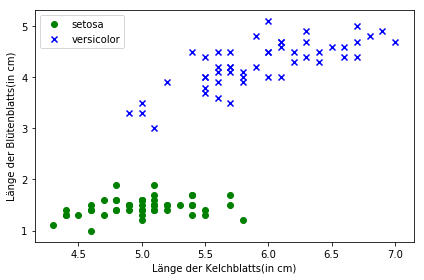

In [44]:
plt.scatter(X[:50, 0], X[:50, 1], color='green', marker="o", label="setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue", marker="x", label="versicolor")
plt.xlabel("Länge der Kelchblatts(in cm)")
plt.ylabel("Länge der Blütenblatts(in cm)")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

In [45]:
ppn_model = Perceptron(eta=0.1, n_iter=10)

ppn_model.fit(X,y)

random weights initialized: [ 0.01624345 -0.00611756 -0.00528172]
xi, target: [5.1 1.4], -1
Net input: 
 -0.022350527991209804
Prediction: 
 -1
xi, target: [4.9 1.4], -1
Net input: 
 -0.021127015163909656
Prediction: 
 -1
xi, target: [4.7 1.3], -1
Net input: 
 -0.019375330584346054
Prediction: 
 -1
xi, target: [4.6 1.5], -1
Net input: 
 -0.019819917675222884
Prediction: 
 -1
xi, target: [5.  1.4], -1
Net input: 
 -0.021738771577559733
Prediction: 
 -1
xi, target: [5.4 1.7], -1
Net input: 
 -0.025770312488950405
Prediction: 
 -1
xi, target: [4.6 1.4], -1
Net input: 
 -0.01929174592295943
Prediction: 
 -1
xi, target: [5.  1.5], -1
Net input: 
 -0.022266943329823187
Prediction: 
 -1
xi, target: [4.4 1.4], -1
Net input: 
 -0.018068233095659282
Prediction: 
 -1
xi, target: [4.9 1.5], -1
Net input: 
 -0.021655186916173116
Prediction: 
 -1
xi, target: [5.4 1.5], -1
Net input: 
 -0.02471396898442349
Prediction: 
 -1
xi, target: [4.8 1.6], -1
Net input: 
 -0.021571602254786493
Prediction: 
 -1


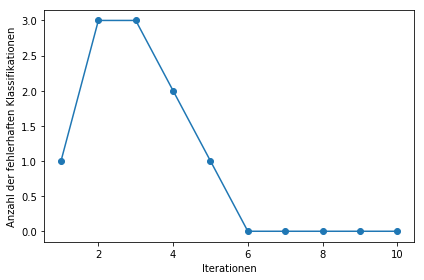

In [46]:
plt.plot(range(1,len(ppn_model.errors_) +1), ppn_model.errors_, marker="o")
plt.xlabel('Iterationen')
plt.ylabel("Anzahl der fehlerhaften Klassifikationen")
plt.tight_layout()
plt.show()

In [29]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Net input: 
 [-2.71394451 -2.72806686 -2.74218921 ...  5.16475715  5.1506348
  5.13651245]
Prediction: 
 [-1 -1 -1 ...  1  1  1]


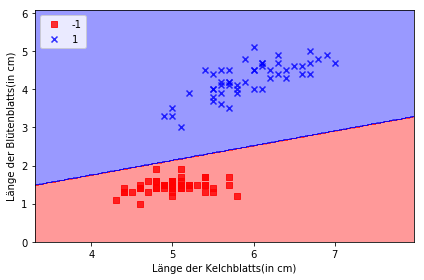

In [49]:
plot_decision_regions(X, y, classifier=ppn_model)
plt.xlabel("Länge der Kelchblatts(in cm)")
plt.ylabel("Länge der Blütenblatts(in cm)")
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## Adaline

In [32]:
class AdalineGD(object):
    """
    Parameter:
    ---------
    eta : float
        Lernrate (zwischen 0.0 und 1.0)
    n_iter : int
        Durchläufe der Trainingsdatensätze
    random_state : int
        Zufallszahlengenerator für Gewichtungen initialisieren
        
    Attribute
    ----------
    w_ : 1d-array
        Gewichtungen nach Anpassung
    errors_ : list
        Anzahl der Fehlklassifizierungen (Updates) pro Epoche (Training)
    
    """
    
    def __init__(self, eta=0.001, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        
        """ Anpassung an die Trainingsdaten
        
        Parameter
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Trainingsvektoren, n_samples ist die Anzahl der Trainingsobjekte
            und n_features ist die Anzahl der Merkmale
        y : array-like, shape = [n_samples]
            Zielwerte
            
        Rückgabewerte
        ----------
        self : object
        """
        
        ngen_random = np.random.RandomState(self.random_state)
        self.w_ = ngen_random.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        #print(f"random weights initialized: {self.w_}")
        self.cost_ = []
        
        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            #print(f"Iteration {_}, Gewichte vor Update: \n {self.w_}")
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0]  += self.eta * errors.sum()
            #print(f"Gewichte nach Update: \n {self.w_}")
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Nettoeingabe berechnen"""
        netinput = np.dot(X, self.w_[1:]) + self.w_[0]
        #print(f"Net input: \n {netinput}")
        return netinput
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [33]:
ada1 = AdalineGD(n_iter=10, eta=0.01, random_state=1).fit(X, y)

In [34]:
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X,y)

Figure(576x288)


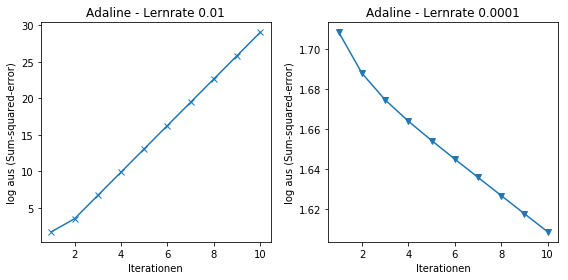

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker="x")
ax[0].set_xlabel('Iterationen')
ax[0].set_ylabel('log aus (Sum-squared-error)')
ax[0].set_title('Adaline - Lernrate 0.01')

ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker="v")
ax[1].set_xlabel('Iterationen')
ax[1].set_ylabel('log aus (Sum-squared-error)')
ax[1].set_title('Adaline - Lernrate 0.0001')

print(fig)
print(ax)

plt.tight_layout()
plt.show()

In [36]:
# standardize features
X_std = np.copy(X)
#print(f"X_std: {X_std}")
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
#print(f"X_std: {X_std}")
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
#print(f"X_std: {X_std}")

X_std: [[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.5]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4. ]
 [5

In [38]:
ada = AdalineGD(n_iter=15, eta=0.001)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./adaline_2.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Iterationen')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('./adaline_3.png', dpi=300)
plt.show()

ValueError: cannot reshape array of size 151632 into shape (243,312)